#### Monte Carlo Simulation for Portfolio Risk Assessment
##### Problem Statement
- A financial analyst wants to calculate the potential risk for a portfolio of three stocks — Apple (AAPL), Microsoft (MSFT), and Google (GOOGL). The goal is to predict future returns of the portfolio using a Monte Carlo simulation.Instead of relying on historical data alone, Monte Carlo simulation allows us to generate thousands of potential future outcomes for stock prices. This helps us understand the probability distribution of future portfolio returns and assess the Value at Risk (VaR).


##### What is a Monte Carlo Simulation?
Monte Carlo simulation generates random outcomes based on historical patterns (like daily returns) and uses these to create possible future paths for stock prices. It helps in understanding the range of potential outcomes, rather than relying on a single estimate.


##### Steps for Monte Carlo Simulation
- Download Stock Data for Apple (AAPL), Microsoft (MSFT), and Google (GOOGL).
- Calculate Daily Returns and volatility.
- Simulate Stock Prices for the next 252 trading days (1 year).
- Run 10,000 Simulations of future stock price paths.
- Calculate Portfolio Returns for each scenario.
- Visualize the Distribution of potential portfolio returns.
- Calculate VaR (Value at Risk) from the simulated returns.


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

##### Step 1: Download data

In [2]:
stocks = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(stocks, start='2023-12-01', end='2024-12-01')['Adj Close']

[*********************100%***********************]  3 of 3 completed


##### Step 2: Calculate returns

In [3]:
returns = data.pct_change().dropna()
mean_returns = returns.mean()
std_devs = returns.std()

##### Step 3: Monte Carlo simulation

In [4]:
days = 252
num_simulations = 10000
simulated_prices = np.zeros((days, len(stocks), num_simulations))

for i, stock in enumerate(stocks):
    last_price = data[stock].iloc[-1]
    drift = mean_returns[i] - (0.5 * std_devs[i] ** 2)
    daily_volatility = std_devs[i]
    random_shocks = np.random.normal(0, 1, (days, num_simulations))
    price_paths = last_price * np.exp(np.cumsum(drift + daily_volatility * random_shocks, axis=0))
    simulated_prices[:, i, :] = price_paths


##### Step 4: Portfolio returns

In [5]:
weights = np.array([0.4, 0.3, 0.3])
portfolio_values = np.sum(simulated_prices * weights[:, np.newaxis], axis=1)


##### Step 5: Calculate Value at Risk (VaR)

In [6]:
final_portfolio_values = portfolio_values[-1, :]
VaR_95 = np.percentile(final_portfolio_values, 5)
print(f"Value at Risk (5%): {VaR_95:.2f}")


Value at Risk (5%): 266.09


##### Step 6: Visualization

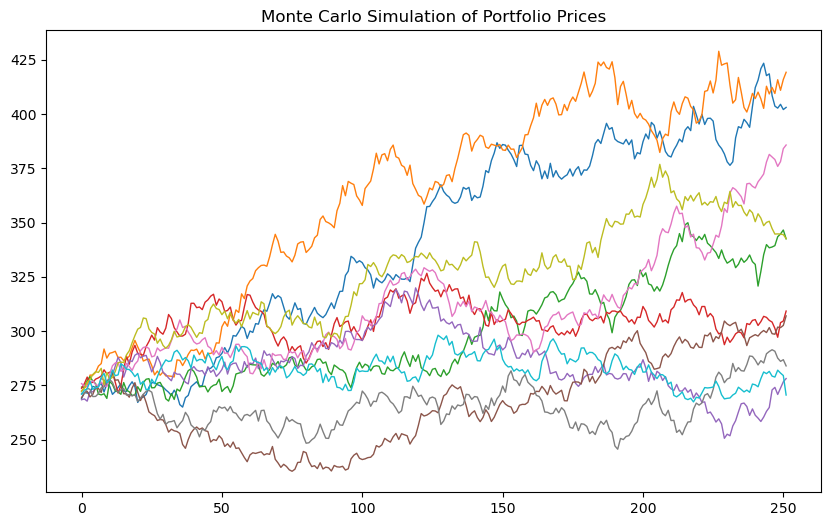

In [7]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(portfolio_values[:, i], lw=1)
plt.title('Monte Carlo Simulation of Portfolio Prices')
plt.show()
